# Anomaly Detection

This chapter introduces you to the concept of **anomaly detection**.

By the end of this chapter, you will...

- be aware of real-world scenarios in which anomaly detection is used
- understand how the definition of "anomaly" depends on the context
- know different machine learning approaches to anomaly detection
- know how to apply a versatile outlier detection algorithm 

## Preamble

In [1]:
import seaborn
import ai_dojo

ai_dojo.setup_plot_style(dark=True)

## Real-World Scenarios

Imagine yourself as a data scientist in the following scenarios:

* **fraud detection in e-commerce**: You are working for an e-commerce business. While most users of your online shop are playing fair, a few are trying to get you to deliver stuff without paying for it. The site has thousands of customers per day, so how can you detect fraudulent transactions efficiently? Maybe there is something suspicious about those, something that makes them stand out from typical customer behavior...
* **intrusion detection for cyber security**: You work for the IT security department. Your IT infrastructure is used by employees all over the world, but is also sometimes the target of hacker attacks. Goal is to build a system that automatically raises an alert when a potential attack happens. Which behavior could it be that makes an intruder different from a normal user?
* **predictive maintenance in the manufacturing industry**: To get ready for the "Internet of things", a manufacturing company has put lots of sensors in all of the production machines on the shop floor. Now you can measure temperature, vibration, noise, power consumption and many more variables over time. While production runs smoothly most of the time, it happens that a machine breaks down, halting production and requiring expensive and time-consuming repairs. What could be done with the sensor data to avoid such a scenario? Can you think of ways to detect a problem before things go up in flames?




## What is normal?

*Anomalies* are occurrences that deviate from the expected or "normal" case. This begs the question: What is normal? 

The honest answer: It depends. "Anomaly detection" is usually not well-defined.  The definition can vary strongly from use case to use case, and a thorough analysis of the use case is always necessary. Keep in mind that...
- ...there is no anomaly detection without context: Statistically, we can say that a data point is far away from the rest - and then call it an  _outlier_.  However, whether this data point is an anomaly that we want to detect depends on the use case.
- .... we should not expect to have a one-size-fits-all "anomaly detection algorithm" that can always be used out of the box.



## Machine Learning for Anomaly Detection: Problem Settings

Machine learning techniques can be relevant for anomaly detection. But before you choose an algorithm, consider three very different ways of setting up the problem for ML:

1. **two-class supervised classification**: Data points in the training data are labeled as "normal" or "anomaly".
2. **clean**: The training data contains only normal data points. The test data also contains anomalies.
3. **unsupervised**: The training data contains a mix of normal and anomaly data points which are not labeled.

## Anomaly Detection through Outlier Detection

In the following, we assume that we can recognize an anomaly as an **outlier** - that is, a data point whose values differ significantly from typical data points.

###  Data Visualization

Data visualization methods, such as box plots and scatter plots, can be helpful to spot outliers visually. 


### Automated Outlier Detection with the Isolation Forest Algorithm

The Isolation Forest algorithm is a well-known method for identifying outliers in multi-dimensional datasets.

In [2]:
from sklearn.ensemble import IsolationForest

In [3]:
outlier_detector = IsolationForest()

We use an example data set from the real estate market. Our task is to identify unusual offerings.

In [4]:
data, descr = ai_dojo.datasets.read_house_prices_seattle()

/Users/cls/Documents/Work/Projects/ExperTeach/AITelekomCloud/ai-training/library/ai_dojo/datasets.py:257: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_descr = pandas.read_csv(descr_path, sep=", ")


In [5]:
descr

,column,description
0,id,a notation for a house
1,date,house was sold
2,price,is prediction target
3,bedroomsNumber,of Bedrooms/House
4,bathroomsNumber,of bathrooms/bedrooms
5,sqft_livingsquare,footage of the home
6,sqft_lotsquare,footage of the lot
7,floorsTotal,floors (levels) in house
8,waterfrontHouse,which has a view to a waterfront
9,view,Has been viewed


In [6]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


For simplicity, let us limit the data to a few important dimensions:

In [7]:
features = data[["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot"]]

An outlier detector like the `IsolationForest` algorithm is a `sklearn` `Estimator` that can be fitted to data:

In [8]:
outlier_detector.fit(features)

IsolationForest()

The "predictions" of the outlier detector come in the form of scores, which are actually "normality" scores: The higher the score, the more splits were needed by this decision-tree based algorithm to isolate the data point. Hence, anomalous points have lower scores than normal points.

In [9]:
normality_scores = outlier_detector.decision_function(features)

We can confirm that normal points are more frequent than anomalous points:

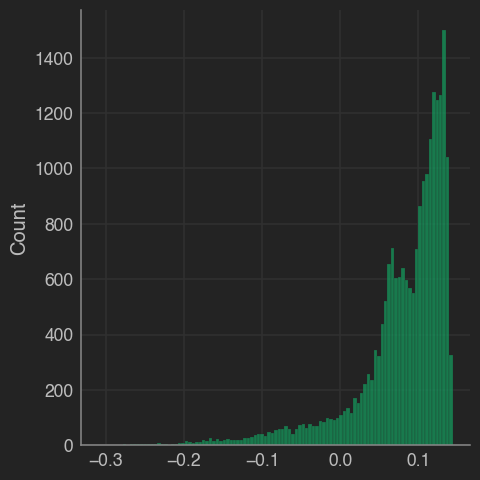

In [10]:
seaborn.displot(normality_scores)

Now let us visalize the normality scores in a scatterplot to get a better picture of what the score expressses.

In [11]:
features["score"] = normality_scores

/var/folders/pl/9s2ysv_92pn6_2w7j2t40mh00000gn/T/ipykernel_89326/1588521855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["score"] = normality_scores


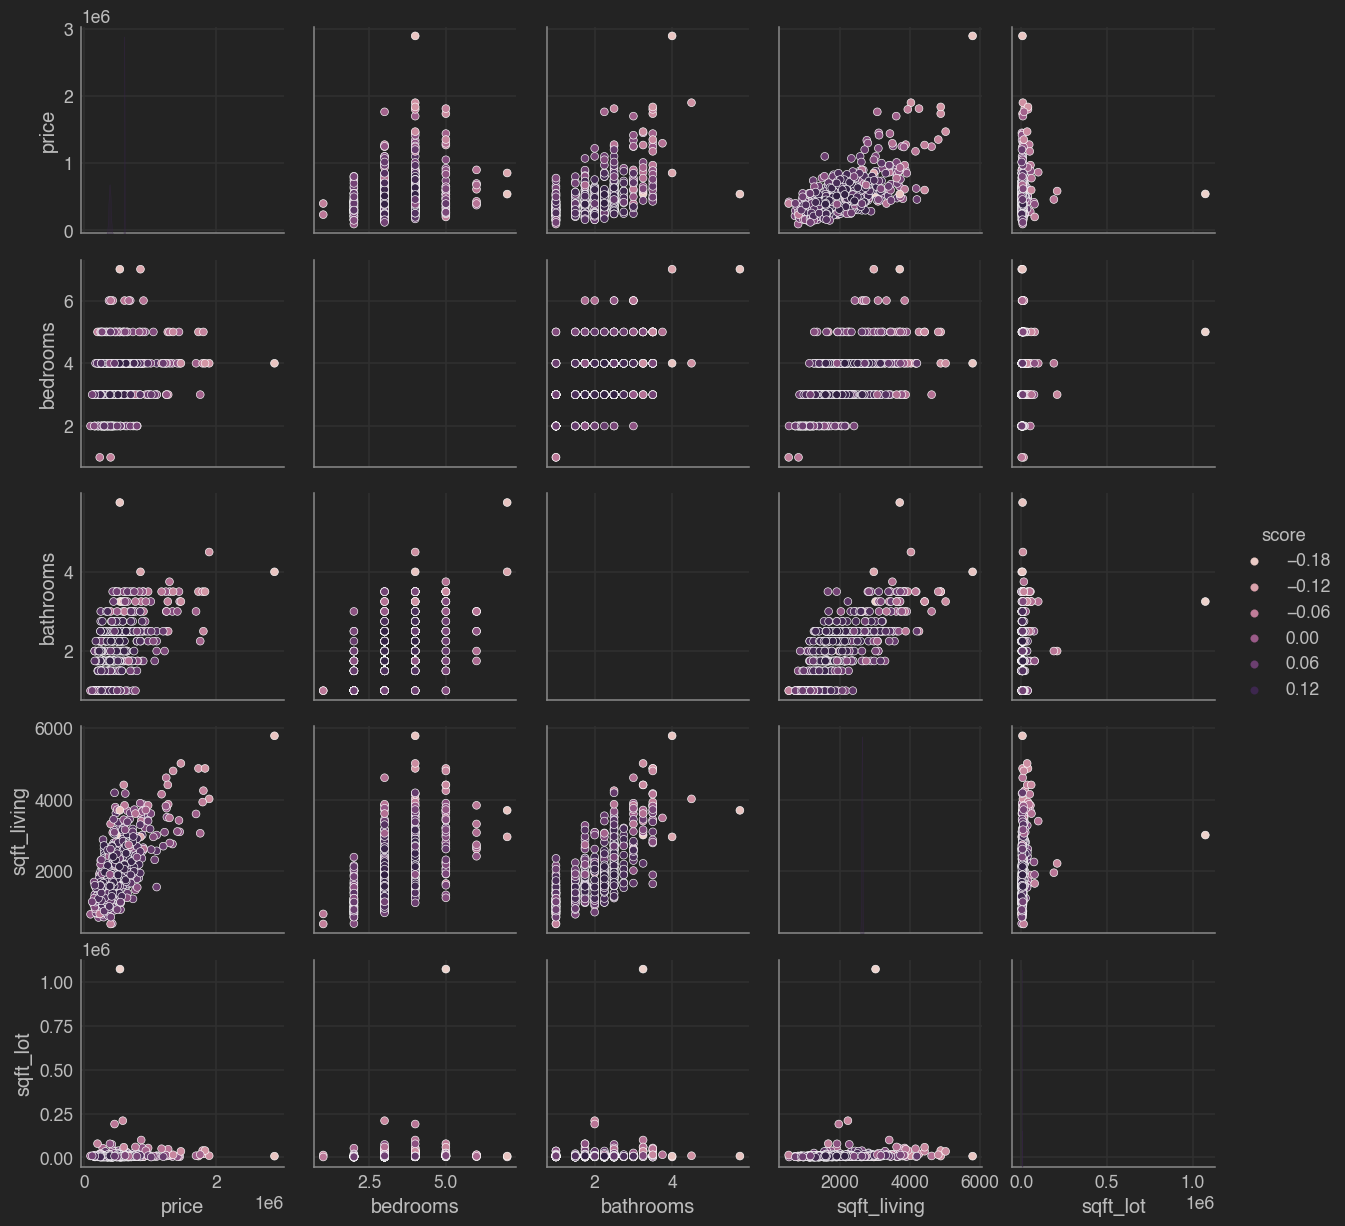

In [12]:
seaborn.pairplot(
    features.sample(n=500),
    hue="score"
)

## Summary


- Anomaly detection covers a wide range of applications, and the definition of "anomaly" should always be carefully examined in the context of the use case. 
- Be aware of the different ways of framing anomaly detection as a machine learning task. Again, which one to choose depends on the use case and the available data.
- Often (but not always), anomalies are _outlier data points_. Machine learning algorithms like _Isolation Forest_ provide a robust way of detecting such outliers. 



## Resources

- [Talk: Anomaly Detection - at PyData London 2018](https://www.youtube.com/watch?v=B5mPqFOx09U) -  "There is no anomaly without context"
- [Talk: Introduction to the Isolation Forest Algorithm](https://youtu.be/RyFQXQf4w4w)
- [Talk: Unsupervised Anomaly Detection with Isolation Forest - Elena Sharova at PyData London 2018](https://youtu.be/5p8B2Ikcw-k)


---
_This notebook is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/). Copyright © 2018-2021 [Point 8 GmbH](https://point-8.de)_